In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import sys
sys.path.append('/homes/yz4009/wd/gitdev/FaceHGNet/detection')
import detect_face
import tensorflow as tf
from scipy import misc

with tf.Graph().as_default():

    sess = tf.Session()
    with sess.as_default():
        with tf.variable_scope('pnet'):
            data = tf.placeholder(tf.float32, (None,None,None,3), 'input')
            pnet = detect_face.PNet({'data':data})
            pnet.load('cas1.npy', sess)
        with tf.variable_scope('rnet'):
            data = tf.placeholder(tf.float32, (None,24,24,3), 'input')
            rnet = detect_face.RNet({'data':data})
            rnet.load('cas2.npy', sess)
        with tf.variable_scope('onet'):
            data = tf.placeholder(tf.float32, (None,48,48,3), 'input')
            onet = detect_face.ONet({'data':data})
            onet.load('cas3.npy', sess)

        pnet_fun = lambda img : sess.run(('pnet/conv4-2/BiasAdd:0', 'pnet/prob1:0'), feed_dict={'pnet/input:0':img})
        rnet_fun = lambda img : sess.run(('rnet/conv5-2/conv5-2:0', 'rnet/prob1:0'), feed_dict={'rnet/input:0':img})
        onet_fun = lambda img : sess.run(('onet/conv6-2/conv6-2:0', 'onet/conv6-3/conv6-3:0', 'onet/prob1:0'), feed_dict={'onet/input:0':img})

minsize = 120 # minimum size of face
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor

source_path = '/homes/yz4009/wd/gitdev/FaceHGNet/detection/ibug135.png'
img = misc.imread(source_path)

bounding_boxes, points = detect_face.detect_face(img, minsize, pnet_fun, rnet_fun, onet_fun, threshold, factor)

#misc.imshow(img)

print('Box Number: %s' % bounding_boxes.shape[0])

Box Number: 135


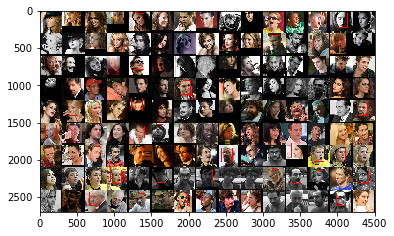

In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
from scipy.io import loadmat
from PIL import Image
from scipy.misc import imresize
import copy
I = np.array(Image.open(source_path))
canvas = I.copy()
for i in range(bounding_boxes.shape[0]):
    cv2.rectangle(canvas,(int(bounding_boxes[i][0]),int(bounding_boxes[i][1])),(int(bounding_boxes[i][2]),int(bounding_boxes[i][3])),(255,0,0))
    cv2.putText(canvas,'%.4f' % bounding_boxes[i][-1],(int(bounding_boxes[i][0]),int(bounding_boxes[i][1])),cv2.FONT_ITALIC,0.5,(0,255,0))
    for j in range(int(points.shape[0]/2)):
        cv2.circle(canvas, (int(points[j, i]), int(points[j+5, i])), 2, (24,109,238), -1)
#plt.imshow(canvas/255)
plt.imshow(canvas)